# Multiline Axis Labels

Multiline axis labels allow better visualization of long categorical values. Instead of overcrowding the axis, labels can now be formatted across multiple lines, enhancing readability. 

* To create a multiline axis label, simply add "\n" inside the string where you want the line break.


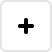
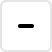
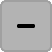
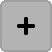
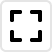
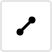
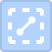
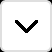
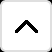
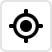
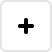
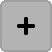
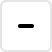
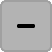
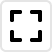
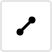
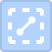
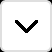
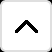
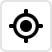

In [1]:
from lets_plot import *
import pandas as pd
import numpy as np

LetsPlot.setup_html()

## Quarters & Years

In [2]:
# Create a DataFrame with artificial income and expenses
np.random.seed(42)
years = [2022, 2023, 2024]
quarters = ["Q1", "Q2", "Q3", "Q4"]

data = []
for year in years:
    base_income = np.random.randint(5000, 15000)  # Base income
    base_expenses = base_income * np.random.uniform(0.6, 0.9)  # Expenses as 60-90% of income
    
    for quarter in quarters:
        income = base_income + np.random.randint(-2000, 2000)  # Add variation
        expenses = base_expenses + np.random.randint(-1500, 1500)
        
        label = f"{quarter}-{year}"
        data.append({"Quarter_Year": label, "Type": "Income", "Amount": round(income)})
        data.append({"Quarter_Year": label, "Type": "Expenses", "Amount": round(expenses)})

df = pd.DataFrame(data)
df.head(4)

,Quarter_Year,Type,Amount
0,Q1-2022,Income,11564
1,Q1-2022,Expenses,9924
2,Q2-2022,Income,11365
3,Q2-2022,Expenses,10432


In [3]:
# Multiline labels for X-axis
x_labels_mapping =  [f"{q}\n{year}" if q == "Q1" else q for year in years for q in quarters]

In [4]:
ggplot(df, aes(x="Quarter_Year", y="Amount", color="Type")) + \
    geom_line(size=1.5) + \
    geom_point(size=4) + \
    scale_x_discrete(labels=x_labels_mapping) + \
    labs(title="Quarterly Income vs Expenses",
         x="Quarters",
         y="Amount ($)") + \
    theme(axis_text_x=element_text(angle=30))